# Analysis of 911 calls 

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
# Loading the dataset
file_path = '911.csv'
data = pd.read_csv(file_path, parse_dates=['timeStamp'], infer_datetime_format=True)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# The minimum and maximum time range of the dataset
print(f"Min range {np.min(data['timeStamp'])} \t |\t Max range{np.max(data['timeStamp'])}")

Min range 2015-12-10 14:39:21 	 |	 Max range2020-06-08 13:14:43


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645716 entries, 0 to 645715
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        645716 non-null  float64       
 1   lng        645716 non-null  float64       
 2   desc       645716 non-null  object        
 3   zip        567493 non-null  float64       
 4   title      645716 non-null  object        
 5   timeStamp  645716 non-null  datetime64[ns]
 6   twp        645434 non-null  object        
 7   addr       645716 non-null  object        
 8   e          645716 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 44.3+ MB


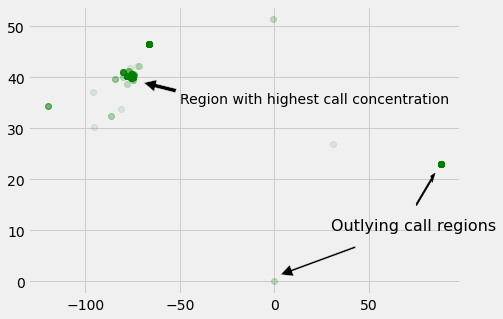

In [6]:
# visualizing the region the calls was made from
figure = plt.Figure()
axes = figure.add_axes((0, 0, 1.0, 1.0))
axes.plot('lng', 'lat', 'go', data=data, alpha=.1)
axes.annotate('Region with highest call concentration', xy=(-70, 39), xytext=(-50, 35),
              arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
axes.text(30, 10, 'Outlying call regions', fontsize=16)
# axes.annotate('', xy=(70, 20), arrowprops=dict(facecolor='black', shrink=0.05))
# axes.annotate('', xy=())
axes.arrow(75, 15, 8, 5, width=.5, color='black')
axes.annotate("", xy=(1, 1), xytext=(45, 7),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2))
figure

From the above plot most of the calls from the dataset are concentrated around an area, too close together to be able to tell the town apart, we could try to stretch out the graph, but we will still see that the regions are pretty much lined up

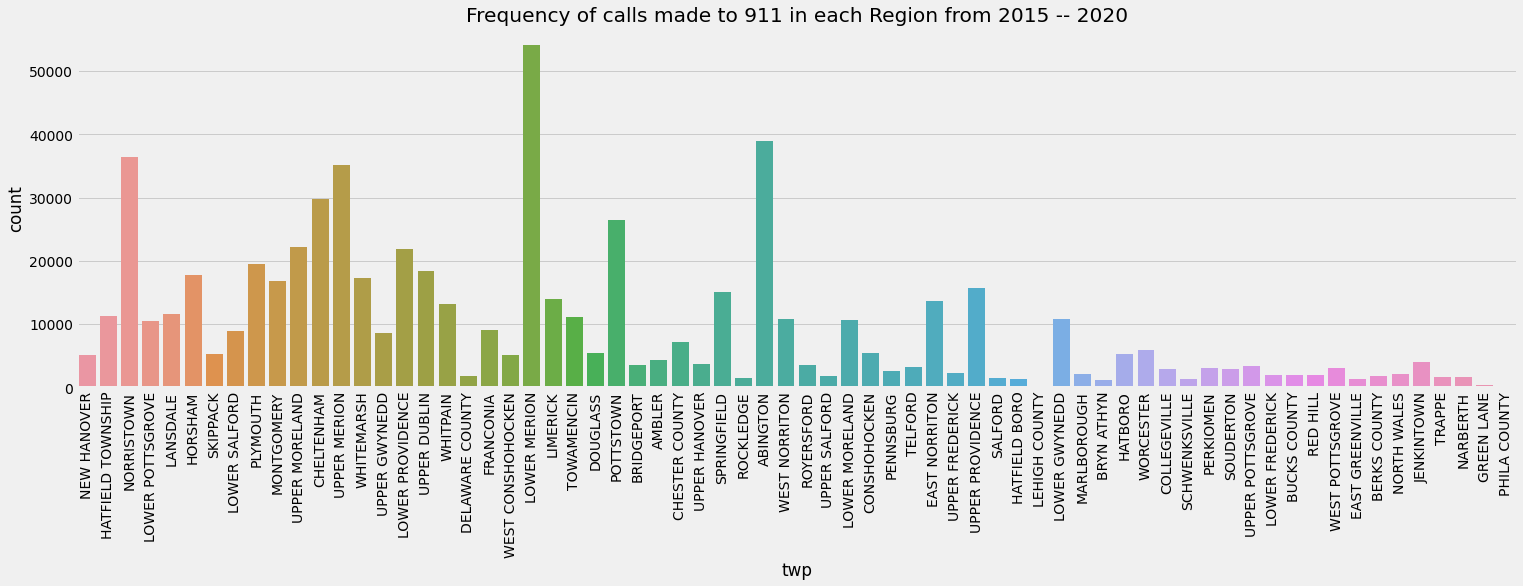

In [8]:
with plt.style.context('fivethirtyeight'):
    fig = plt.Figure(figsize=(20, 5))
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_title('Frequency of calls made to 911 in each Region from 2015 -- 2020')
    x_ticks = ax.get_xticklabels()
    plt.setp(x_ticks, rotation=90)
    sns.countplot(x='twp', data=data, ax=ax)
fig

#### From the above plot, we can see which regions are relatively accident-free or threat-free due to the low number of calls made to 911 from those regions, so that a recommendation system could be built for a tourist attraction site that can recommend those regions of safety if security is a prominent criterion for a visitor

In [62]:
# The top 5 regions with the highest reported incidents
regions_count = dict(data['twp'].value_counts().head(5).items())
frame = pd.DataFrame([regions_count.keys(), regions_count.values()]).T
frame.columns = ['Regions', 'Number of Reported Incident']
frame

,Regions,Number of Reported Incident
0,LOWER MERION,54204
1,ABINGTON,38929
2,NORRISTOWN,36471
3,UPPER MERION,35098
4,CHELTENHAM,29774


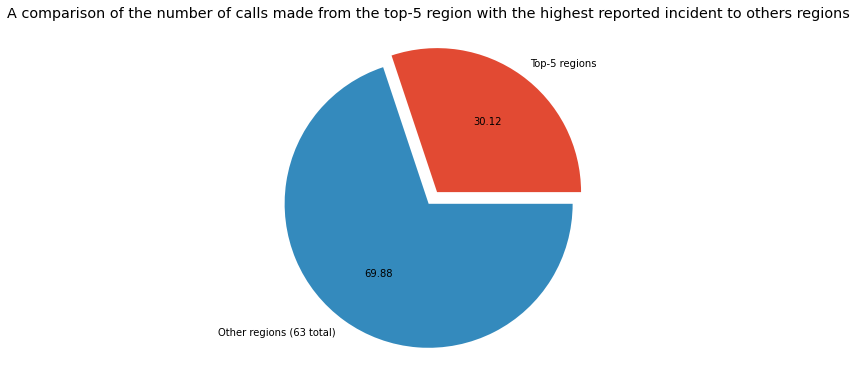

In [121]:
with plt.style.context('ggplot'):
    top_5_total = frame['Number of Reported Incident'].sum()
    other_region_total = len(data) - top_5_total
    
    labels = ['Top-5 regions', 'Other regions (63 total)']
    values = [top_5_total, other_region_total]
    
    explode_array =[0.1, 0]
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title('A comparison of the number of calls made from the top-5 region with the highest reported incident to others regions')
    axes, texts, _ = ax.pie(values, labels=labels, explode=explode_array, autopct="{:.2f}".format)

### This is pretty incredible, this means that 1 out of 3 reported calls was made out of the top 5 regions, and from those top 5 regions, two of them are from Lower and Upper Merion (The Merion's)
|

#### We have seen the frequency of reported incident in each region. Next, we move on to the actual reasons those calls were made in the first place.

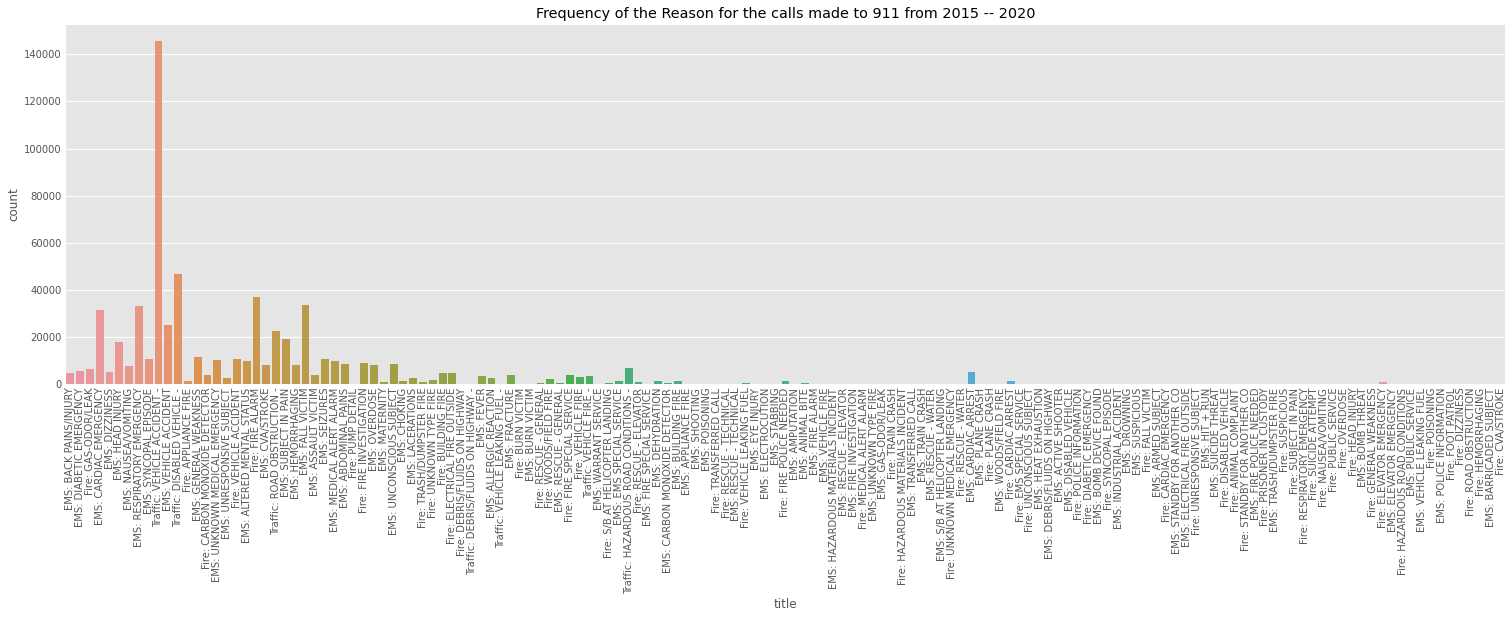

In [9]:
with plt.style.context('ggplot'):
    fig = plt.Figure(figsize=(20, 5))
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_title('Frequency of the Reason for the calls made to 911 from 2015 -- 2020')
    ax.set_xlabel('What are people calling the 911 for?')
    x_ticks = ax.get_xticklabels()
    plt.setp(x_ticks, rotation=90)
    sns.countplot(x='title', data=data, ax=ax)
fig

The majority of the calls made were about Traffic vehicle accidents. Here a list of the top five most frequent calls made
* Traffic Vehicle accident
* Traffic Disabled vehicle
* Fire Alarm
* Fall victim
* Respiratory emergency


|

We have just taken a sneak peek into the 911 dataset and it is very much obvious that it can be used to answer a lot of hard pertinent question isn't it?

Questions like:
* Which incident get reported the most?
* Which regions have the highest number of incidents reported?
* Which year have the highest reported incident? (Do they occur more during the New Year, or towards the Christmas season?)
* Likewise which month do most of this incident occur on through the years?

Questions which are going to be answered here, but it is fairly obvious right from the onset that all forms of Traffic accidents get reported a lot more than any other kind of incidents combined, and most of those calls were made from Lower Merion. The dataset can be used to answer a lot more question than those mentioned here, questions about other incidents.

But in this notebook, we are going to be focusing on a subset of the data, which are on calls made about Traffic vehicle accidents. We are going to also use the subset of data to ask questions like:
* Which regions have the highest number of reported traffic incidents?
* Which year have the highest reported traffic incident?
* Which month do most of these traffic incident occur?

In [123]:
# As per our objective, we are selecting a subset of the 
# data which are incidents relating to Traffic: Vehicle Accident
# which we can intuitive deduced from it total that it comprises of 
# almost 30% of all the reported incident
veh_acc = data.loc[data['title'] == 'Traffic: VEHICLE ACCIDENT -']
veh_acc.shape

(145526, 9)

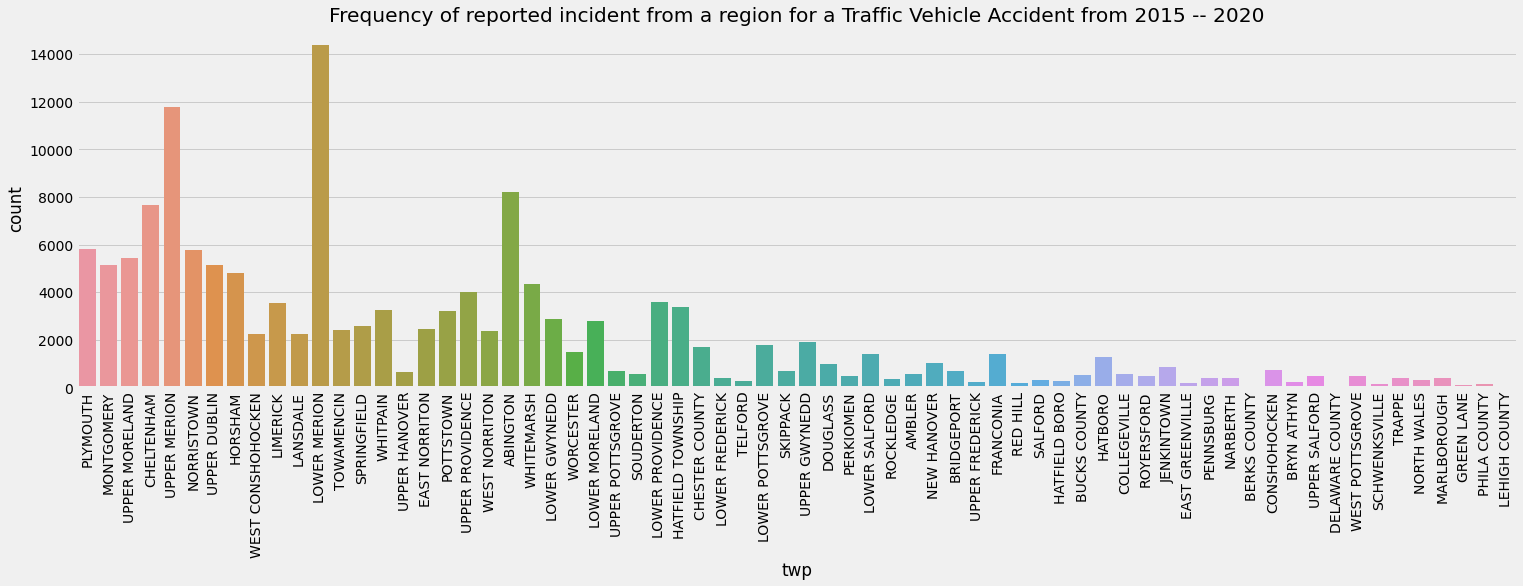

In [124]:
fig = plt.Figure(figsize=(20, 5))
ax = fig.add_axes((0, 0, 1, 1))
ax.set_title('Frequency of reported incident from a region for a Traffic Vehicle Accident from 2015 -- 2020')
x_ticks = ax.get_xticklabels()
plt.setp(x_ticks, rotation=90)
sns.countplot(x='twp', data=veh_acc, ax=ax)
fig

#### This subset of data is similar to the total data. It looks like the highest number of calls made to 911 about vehicle accidents was made from Lower Merion and the next from Upper Merion. Suffice it to say Lower Merion has the highest accident rate from 2015 - 2020. In summary, Lower Merion has the highest call traffic to 911, and from our previous knowledge of the frequency of reported incidents. We can then assume with high certainty that those calls were about Vehicle accidents. Prove of which we will soon see.

|

#### We are going to step back a little now to have a much broader view.


For a little flashback
* The most reported incident is Traffic: Vehicle accidents
    * The highest reported Traffic: Vehicle accidents was made from Lower Merion followed by Upper Merrion.
* The highest number of reported incidents was made from Lower Merion.
* 1 out of 3 calls was made from the top-5 region with the highest reported incident counts (Two of which are Lower Merion and Upper Merion)

We can see how Lower Merion kept topping the charts, which means Lower Merion is the central region in this dataset leading one to the following conclusions
* Lower Merion is a death trap for vehicles (and we are going to found out why?).
* There were biased in the recording of the dataset, with a whole lot more calls from Lower Merion was recorded than in any other region.

|

### So, therefore, we are going to study Lower Merion in more details

In [125]:
# Gather dataset of reported incidents made only from Lower Merion
lower_merion = data.loc[data['twp'] == 'LOWER MERION']
lower_merion.shape

(54204, 9)

Text(0.5, 1.0, 'Percentage of Calls made in Lower Merion to 911 for a Reason from 2015 - 2020')

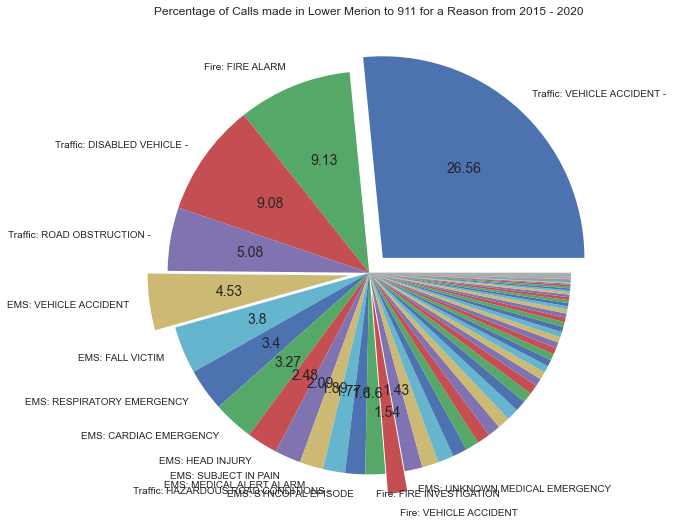

In [126]:
def display_percentage(x):
    """display only the percentage of the pie above the threshold"""
    threshold = 1.4
    if x < threshold:
        return ''
    else:
        return np.round(x, decimals=2)
    
mpl.style.use('seaborn')
labels, values = dict(lower_merion['title'].value_counts()).keys(), dict(lower_merion['title'].value_counts()).values()

# format the labels to properly displayed on the chart
# i.e., it will only display the labels of those whose percentage is greater than 1. 4
labels = [x if percentage > 1.4 else '' for x, percentage in zip(labels, (list(values) / sum(list(values))) * 100)]

explode_array = [0.1 if 'vehicle accident' in x.lower() else 0 for x in labels]

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1])
axes, texts, _ = ax.pie(values, explode=explode_array, labels=labels, autopct=display_percentage)
ax.set_title('Percentage of Calls made in Lower Merion to 911 for a Reason from 2015 - 2020')

#### If we add all the calls attributed to vehicle accidents regardless of what initiated it, which are:
* Traffic: VEHICLE ACCIDENT  (26.56%)
* EMS: VEHICLE ACCIDENT  (4.53%)
* Fire: VEHICLE ACCIDENT  (1.54%)  Total 32.63%


Then almost a third of the calls made to 911 from 2015 - 2020 in Lower Merion alone was because of Vehicle accidents. It will be more if Upper Merion was added to the analysis. Therefore security and emergency services should be on the high alert for vehicle-related accident much more than any other 

#### NOTE: This might not be the case for other regions, but this is certainly the case for Lower Merion 

|

#### All this analysis can be easily deduced by anyone who just looks at the data. But it does not answer any of the crucial and more specific questions we outlined above, questions like;
* At what time of the day do this accident tend to happen (Morning, Afternoon or Evening)
* Do this accident occurs more often during the festive seasons (Christmas, Easter, etc.)


Answers to these questions will enable various agencies to better able planned to manage such crises in time, therefore saving more lives

We will approach these answers indirectly. We will first look at how many calls, in general, were made each month to 911 and at what point in time before we go specifically into Vehicle accident and also using Lower Merion as a test case.

Text(0.5, 1.0, 'No of reported incident made in each year from 2015 - 2020')

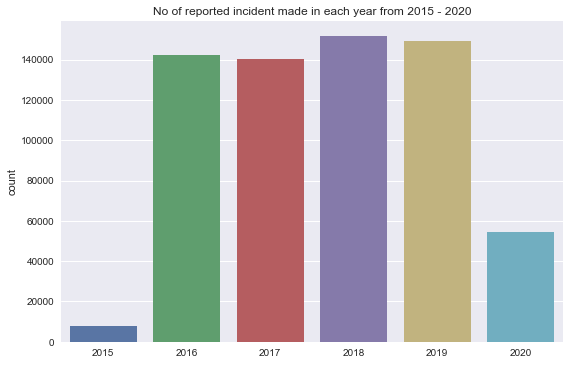

In [129]:
# plot the number of calls made to 911 each month irrespective of which incident
# Which year experienced the highest calls made from 2015-2020
# NOTE: We are using the total data for these few instances
year_calls_made = [date.year for date in data['timeStamp']]
sns.countplot(x=year_calls_made)
plt.title('No of reported incident made in each year from 2015 - 2020')

Not surprising since the data time series was from Thurs 10 Dec 2015 to Mon 8 June 2020, so those two different years will have much fewer calls made than the others. With the other years having roughly equal calls made in it

Text(0.5, 1.0, 'No of calls made in each month during the years regardless of incident')

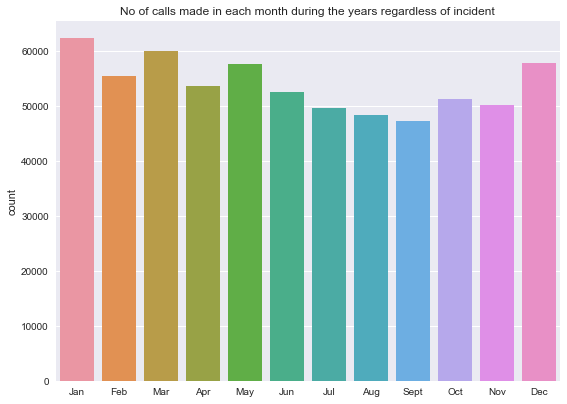

In [14]:
month_calls_made = [date.month for date in data['timeStamp']]
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=month_calls_made, ax=ax)

ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])
plt.title('No of calls made in each month during the years regardless of incident')

During 2015 - 2020 much of the reported incident was made in Jan, March and Dec regardless of the situation. From this, we could say calls to 911 tends to happen more in January than on any other month, with the least in Sept.

#### You may have noticed this by now from the previous yearly plot. But this dataset is imbalanced because some months are missing in 2015 and 2020. So to create a more balanced dataset to expect a more generalistic representation, we are using only a subset of the dataset containing years from 2016 - 2019.

In [130]:
# selecting every reported incident made from 2016 to 2019
data_balanced = data[(data['timeStamp'] >= pd.Timestamp(day=1, month=1, year=2016)) & (data['timeStamp'] <= pd.Timestamp(day=31, month=12, year=2019))]

Text(0.5, 1.0, 'Number of reported incident made in each year from 2016 - 2019 (Balanced Dataset)')

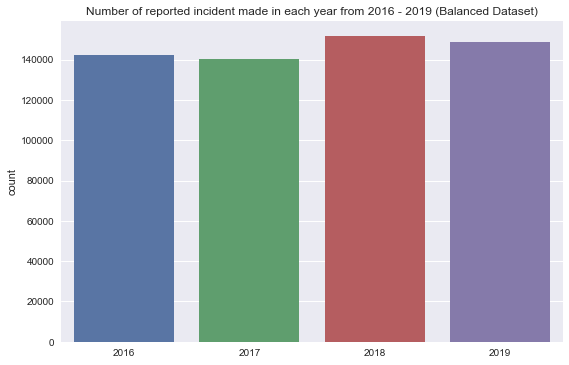

In [132]:
# plot the number of reported incidents made in each month irrespective of which incident
# Which year experienced the highest calls made from 2015-2020
year_calls_made = [date.year for date in data_balanced['timeStamp']]
sns.countplot(x=year_calls_made)
plt.title('Number of reported incident made in each year from 2016 - 2019 (Balanced Dataset)')

Text(0.5, 1.0, 'No of calls made in each month during the years regardless of incident from 2016 - 2019')

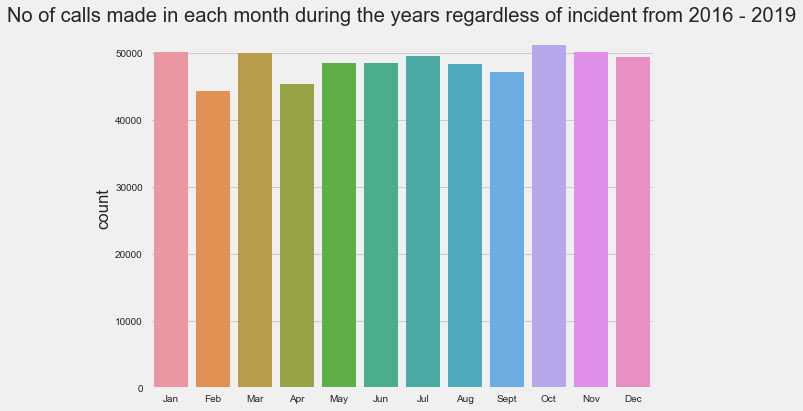

In [135]:
month_calls_made = [date.month for date in data_balanced['timeStamp']]
fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=month_calls_made, ax=ax)

ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])
plt.title('No of calls made in each month during the years regardless of incident from 2016 - 2019')

#### This plot show the true distribution of reported incident made each month which provides a better representation than the imbalanced dataset. We can now see that the total number of reported incidents made is higher during the beginning and towards the ending of each year and the least in February. 

#### Note: This might not always be the case in each of the years. This is only their cumulative sum, as February might not always have the least number of reported incidents made in a particular year or January having the most calls made each year which we will see below.

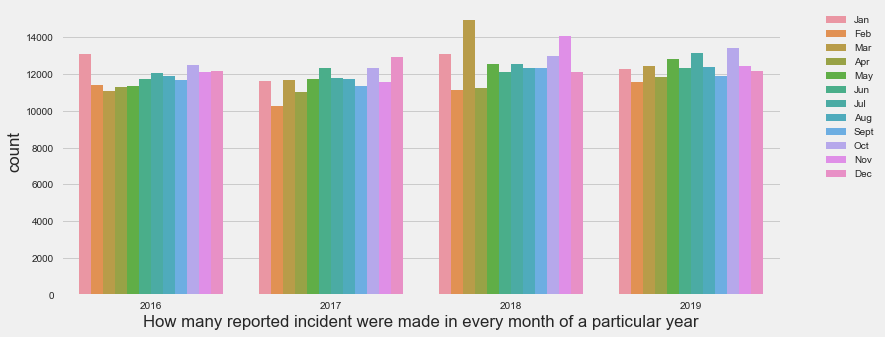

In [136]:
# month_calls_made = [date.month for date in data['timeStamp']]
mpl.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=year_calls_made, hue=month_calls_made, ax=ax)
ax.set_xlabel("How many reported incident were made in every month of a particular year")
# ax.text(3, 23, 'love')
# plt.title('No of calls made in each month of each year regardless of incident')
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], bbox_to_anchor=(1.05, 1), loc=2)

Insight from the above plot:
* In 2016 most calls were made in January, with the least in March
* In 2017 most calls were made in December, with the least in February
* In 2018 most calls were made in March, with the least in February
* In 2019 most calls were made in October, with the least in February

#### The above plot can also be view differently or oppositely; seeing the number of calls made in each year of different month. For example, "in February how many calls was made in each were at this particular month"... (A brain twister, I know)

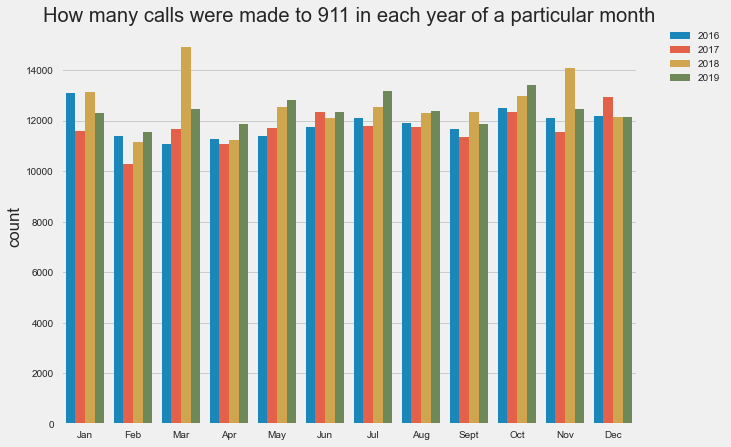

In [19]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.countplot(x=month_calls_made, hue=year_calls_made, ax=ax)
ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])
ax.set_title('How many calls were made to 911 in each year of a particular month')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Now drawing our attention back to our focus on vehicle accident, we are going to repeat our analysis to see if the rate of vehicle accidents in this new balanced dataset will still have the same overwhelming impact as it did in the unbalanced dataset.

In [138]:
veh_acc_balanced = data_balanced.loc[data_balanced['title'] == 'Traffic: VEHICLE ACCIDENT -']

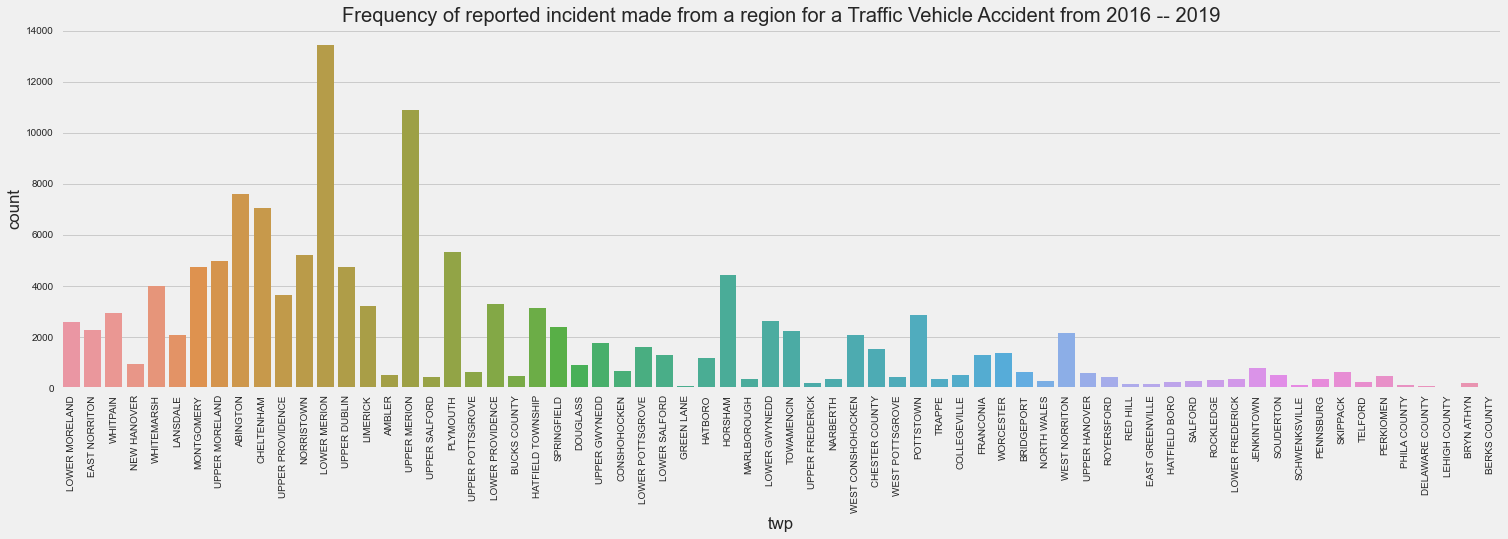

In [140]:
fig = plt.Figure(figsize=(20, 5))
ax = fig.add_axes((0, 0, 1, 1))
ax.set_title('Frequency of reported incident made from a region for a Traffic Vehicle Accident from 2016 -- 2019')
x_ticks = ax.get_xticklabels()
plt.setp(x_ticks, rotation=90)
sns.countplot(x='twp', data=veh_acc_balanced, ax=ax)
fig

#### They are more constrained version of the fully imbalanced datasets

In [141]:
# Gather dataset of calls made only from Lower Merion
lower_merion_balanced = data_balanced.loc[data_balanced['twp'] == 'LOWER MERION']
lower_merion_balanced.shape

(49535, 9)

Text(0.5, 1.0, 'Percentage of reported incident made in Lower Merion for a Reason from 2016 - 2019')

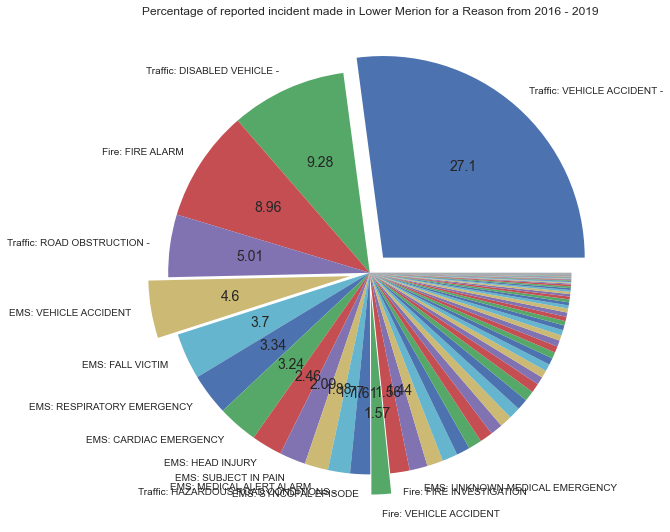

In [143]:
mpl.style.use('seaborn')
labels, values = dict(lower_merion_balanced['title'].value_counts()).keys(), dict(lower_merion_balanced['title'].value_counts()).values()
# format the labels to properly displayed on the chart
labels = [x if percentage > 1.4 else '' for x, percentage in zip(labels, (list(values) / sum(list(values))) * 100)]

explode_array = [0.1 if 'vehicle accident' in x.lower() else 0 for x in labels]

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1])
axes, texts, _ = ax.pie(values, explode=explode_array, labels=labels, autopct=display_percentage)
ax.set_title('Percentage of reported incident made in Lower Merion for a Reason from 2016 - 2019')

If anything, there is an increase in the percentage of calls about vehicle accident made to 911

### Now what do we know so far?
* Most of the calls made to 911 were about vehicle accident
* Most of the calls made were from Lower and Upper Merion
* Also the calls made from Lower Merion was mostly about Vehicle accident which constitutes almost a quarter of the total reported incidents.

* 2018 has the highest number of calls made, and 2017 the lowest
* The highest number of calls are made at the beginning and end of each year
* February is the month where the least number of incidents were reported.


# What Next?
### We are going to answer more specific questions while focusing on vehicle accident in Lower Merion. Questions like;
* Which year has the highest calls about vehicle accident
* Which month experiences more calls made to 911 about vehicle accident
* Which day of the week do they most often make these calls


In [146]:
# retrieved on the calls made to 911 from Lower Merion for vehicle accident 
lower_merion_vehicle_accident_balanced = lower_merion_balanced[lower_merion_balanced['title'] == 'Traffic: VEHICLE ACCIDENT -']
lower_merion_vehicle_accident_balanced

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
8079,40.017584,-75.303090,W MONTGOMERY AVE & BOOTH LN; LOWER MERION; 201...,19041.0,Traffic: VEHICLE ACCIDENT -,2016-01-01 15:40:13,LOWER MERION,W MONTGOMERY AVE & BOOTH LN,1
8218,40.026899,-75.234430,PRICE ST & FAIRVIEW AVE; LOWER MERION; 2016-01...,19004.0,Traffic: VEHICLE ACCIDENT -,2016-01-02 06:28:00,LOWER MERION,PRICE ST & FAIRVIEW AVE,1
8322,40.004556,-75.284357,LANCASTER AVE & CHATHAM RD; LOWER MERION; 2016...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-01-02 13:22:11,LOWER MERION,LANCASTER AVE & CHATHAM RD,1
8345,40.015471,-75.305895,W LANCASTER AVE & BUCK LN; LOWER MERION; 2016-...,19041.0,Traffic: VEHICLE ACCIDENT -,2016-01-02 14:35:20,LOWER MERION,W LANCASTER AVE & BUCK LN,1
8388,40.024967,-75.282905,SCHUYLKILL EXPY & RIGHTERS FERRY RD UNDERPASS;...,NaN,Traffic: VEHICLE ACCIDENT -,2016-01-02 16:47:50,LOWER MERION,SCHUYLKILL EXPY & RIGHTERS FERRY RD UNDERPASS,1
...,...,...,...,...,...,...,...,...,...
590575,40.013856,-75.227959,SCHUYLKILL EXPY & RAMP I76 WB TO BELMONT AVE; ...,19004.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 08:21:27,LOWER MERION,SCHUYLKILL EXPY & RAMP I76 WB TO BELMONT AVE,1
590802,40.031283,-75.269216,CONSHOHOCKEN STATE RD & MILL CREEK RD; LOWER M...,19035.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 17:42:33,LOWER MERION,CONSHOHOCKEN STATE RD & MILL CREEK RD,1
590839,40.000163,-75.228718,W CITY AVE & BALA AVE; LOWER MERION; 2019-12-3...,19131.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 19:05:57,LOWER MERION,W CITY AVE & BALA AVE,1
590866,40.000163,-75.228718,W CITY AVE & BALA AVE; LOWER MERION; 2019-12-3...,19131.0,Traffic: VEHICLE ACCIDENT -,2019-12-30 20:30:41,LOWER MERION,W CITY AVE & BALA AVE,1


In [147]:
year_calls_made_lower_merion_vehicle_accident_balanced = [date.year for date in lower_merion_vehicle_accident_balanced['timeStamp']]
month_calls_made_lower_merion_vehicle_accident_balanced = [date.month for date in lower_merion_vehicle_accident_balanced['timeStamp']]

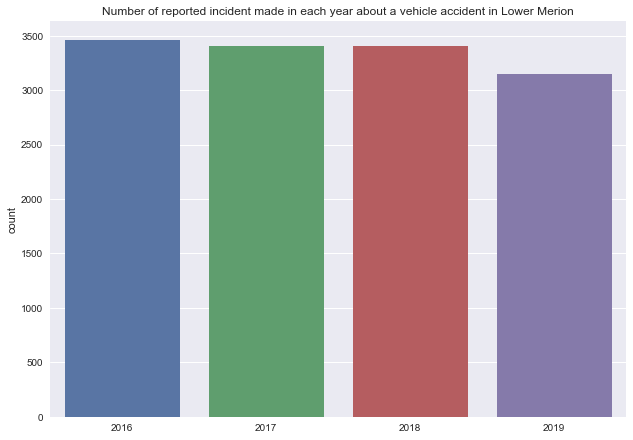

In [149]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Number of reported incident made in each year about a vehicle accident in Lower Merion")
sns.countplot(x=year_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)

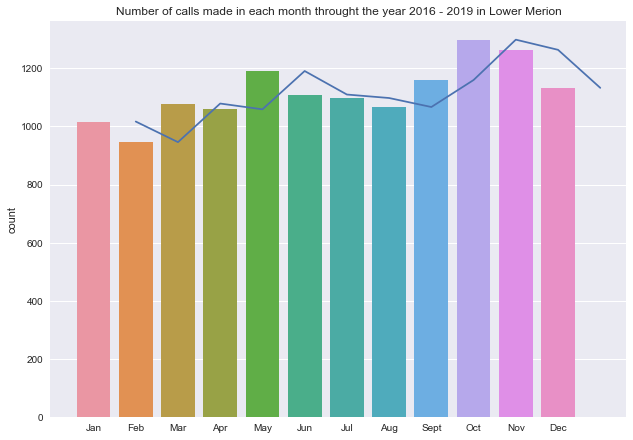

In [150]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Number of calls made in each month throught the year 2016 - 2019 in Lower Merion")
sns.countplot(x=month_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)
ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
])

x, y = np.unique(month_calls_made_lower_merion_vehicle_accident_balanced, return_counts=True)
sns.lineplot(x=x, y=y, ax=ax)

#### As you can see, regardless of which year reported incidents tends to 911 tends to increase going down the year, i.e., more calls are made during the ending of the year than at the beginning

|

### Now, we will be focusing on which days do this incident happens?

In [151]:
day_calls_made_lower_merion_vehicle_accident_balanced = [date.day_name() for date in lower_merion_vehicle_accident_balanced['timeStamp']]

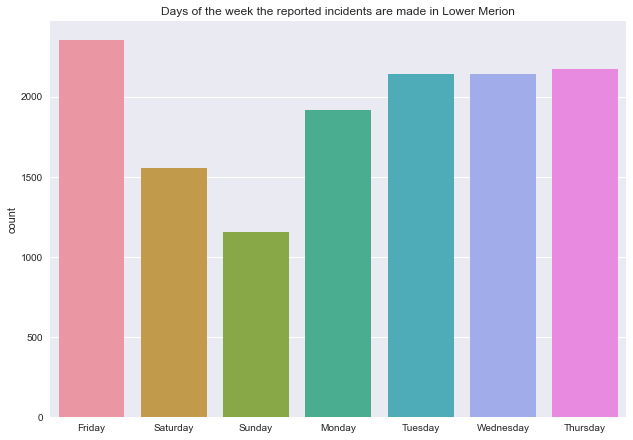

In [152]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Days of the week the reported incidents are made in Lower Merion")
sns.countplot(x=day_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)


As displayed in the above plot, most accidents happen during Friday which is the end of workdays for most people and the least accidents happens during the weekends when most people are at home with their families. It experiences a very sharp increase on Mondays and tends to slightly rise through the weekday (I guess with rising frustration at work) and climax on Friday. A lot of information is revealed in these plots, let take it a bit further and see at what time in the day do these accidents happen (Mornings, Afternoon or Night)?

Text(14, 1300, 'Work closing hour')

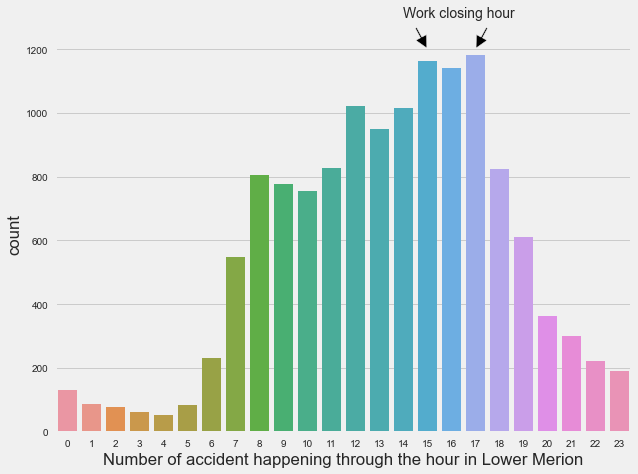

In [211]:
hour_calls_made_lower_merion_vehicle_accident_balanced = [date.hour for date in lower_merion_vehicle_accident_balanced['timeStamp']]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('Number of accident happening through the hour in Lower Merion')

sns.countplot(x=hour_calls_made_lower_merion_vehicle_accident_balanced, ax=ax)

ax.annotate('', xy=(15, 1200), xytext=(14.5, 1270),
          arrowprops=dict(facecolor='black', shrink=0.05, width=1.5), fontsize=14)
ax.annotate('', xy=(17, 1200), xytext=(17.5, 1270), 
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5), fontsize=14)
ax.text(14, 1300, 'Work closing hour', fontsize=14)

To compress the hours further into day AM and PM.

Text(0.5, 1.0, 'The number of reported incidents made at AM and PM from Lower Merion')

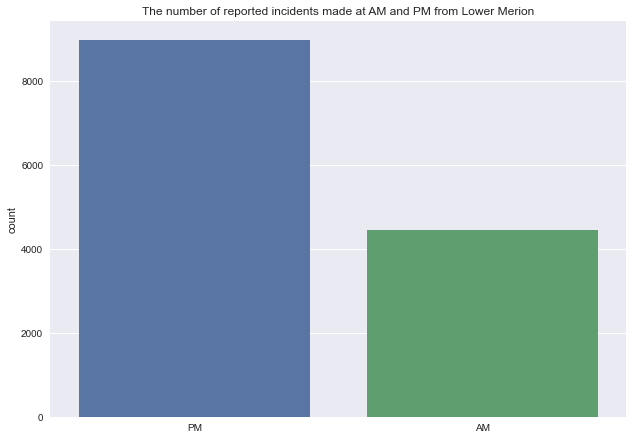

In [153]:
day_night = [date.strftime('%p') for date in lower_merion_vehicle_accident_balanced['timeStamp']]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

sns.countplot(x=day_night, ax=ax)
ax.set_title("The number of reported incidents made at AM and PM from Lower Merion")

# Conclusion
From this analysis, we can conclude namely that;
* Vehicle accident ranks the highest reported incident
* The highest Vehicle reported accident was made from Lower Merion followed by Upper Merion
* Vehicle accident reported incidents constitutes about a quarter of all incident reported in Lower Merion
* 2016 was the highest reported incident of vehicle accidents in Lower Merion and has been on a slight decrease over the past three years
* There is an increase in the number of reported incidents toward the ending and beginning of each year in Lower Merion
* Of the days of the week, Fridays have the highest number of reported vehicle accidents in every month, year, with Sunday having the least reported vehicle incident in Lower Merion
* Most of the vehicle accidents happens from 7 am to 6 pm, with a sharp increase in the accident from 3 pm to 5 pm and a corresponding sharper decrease from 6 pm in Lower Merion
* Or you could say more vehicle accident happens in the PM than in the AM in Lower Merion

But why the high rate of vehicle incident in Lower Merion? Click on the image below to find out!

<a href=https://www.zavodnicklaw.com/philadelphia-car-accident-lawyer/statistics/><img src="img/lower_merion.jpg" alt="multiple accident on highway" class="bg-primary mb-1" width="600px"></a>

Multiple car accident in **Lower Merion**